# <font color='darkblue'>Artificial Neural Network (ANN)</font>

---

## <font color='darkblue'>Lý thuyết</font>
Ở những chương đầu tiên trong lớp học này, chúng ta đã bắt đầu cuộc hành trình và đi qua các thuật toán học máy với neural thần kinh nhân tạo trong **chương 2, Training Simple Machine Learning Algorithms for Classification**. Neural thần kinh nhân tạo có thể được hình dung như các khối gạch được sử dụng để xây nên một mạng thần kinh nhân tạo đa lớp (Multi layers artificial NNs), cái mà chúng ta sẽ cùng đề cập tới trong chương này. 

### <font color='blue'>Mô hình hóa các bài toán phức tạp với ANN</font>
Khái niệm cơ bản đằng sau các NN nhân tạo được xây dựng trên **các giả thuyết và mô hình về cách thức hoạt động của bộ não con người** để giải quyết các nhiệm vụ phức tạp. Mặc dù NN nhân tạo chỉ mới phổ biến trong những năm gần đây, nhưng những nền tảng khái niệm đầu tiên của NN được xây dựng vào những năm đầu 1940 khi Warren McCulloch và Walter Pitts lần đầu tiên mô tả lại cách mà các neural hoạt động. *{A logical calculus of the ideas immanent in nervous activity, W. S. McCulloch and W. Pitts. The Bulletin of Mathematical Biophysics, 5(4):115–133, 1943.}*

Tuy nhiên, sau nhiều thập kỷ kể từ khi thực nghiệm mô hình neural nhân tạo đầu tiên được thực hiện *(Rosenblatt's perceptron vào năm 1950s)*. Nhiều nhà nghiên cứu và nghiên cứu sinh dần dần chán nản và mất đi hứng thú với NN vì không một ai vào lúc bấy giờ có thể cho ra một giải pháp tốt cho NN nhiều lớp. 

*Dành cho các đọc giả quan tâm đến lịch sử của Artificial Intelligence (AI), machine learning hay NN nói riêng, tôi khuyến khích các bạn đọc qua bài viết bằng tiếng Anh rất chi tiết về các giai đoạn này trên Wikipedia có tựa [AI winters](https://en.wikipedia.org/wiki/AI_winter).*

Cuối cùng, vào năm 1986 khi D.E.Rumelhart, G.E. Hinton và R.J. Williams đã công bố thuật toán backpropagation để đào tạo NN hiệu quả hơn, chúng ta sẽ thảo luận chi tiết hơn sau trong chương này, đã đưa NN trở lại cuộc đua trong lĩnh vực trí nghiên cứu về trí tuệ nhân tạo cùng với sự phát triển vượt bậc của phần cứng (GPU, TPU) mà NN đã và đang ngày càng trở nên phổ biến hơn bao giờ hết. Từ đó dẫn đến sự ra đời của khái niệm kiến trúc hay giải thuật **deep learning** mà chúng ta vẫn thường hay ghe tới. Một chủ đề nóng không chỉ trong giới nghiên cứu học thuật mà còn được đầu tư một khoản không nhỏ từ các ông lớn trong ngành công nghệ như Facebook, Microsoft, Amazon, Uber, và Google.

Cho đến ngày nay, các NN phức tạp được hỗ trợ bởi các thuật toán học sâu được coi là giải pháp tiên tiến (SOTA) để giải quyết vấn đề phức tạp như nhận dạng hình ảnh, giọng nói hay xử lý ngôn ngữ. Các ví dụ phổ biến về các sản phẩm trong cuộc sống hàng ngày của chúng ta được hỗ trợ bởi các NN học sâu là tìm kiếm hình ảnh của Google và Google Dịch - một ứng dụng cho điện thoại thông minh có thể tự động nhận dạng văn bản trong hình ảnh để dịch theo thời gian thực sang hơn 20 ngôn ngữ.

### <font color='blue'>Nhắc lại về mạng neural một lớp</font>
Trước khi đi chi tiết hơn về kiên trúc NN đa lớp, hãy cùng nhặc lại một vài khái niệm về NN một lớp mà chúng ta đã được giới thiệu trong chương 2, Training Simple Machine Learning Algorithms for
Classification, có tên gọi là giải thuật **ADAptive LInear NEuron (Adaline)**.
![hinh 1](https://raw.githubusercontent.com/HuangRihChang/machine_learning_basic/master/ANNs/images/SLNN.png)
<div align="center">hình 1. kiến trúc của mạng neural nhân tạo một lớp</div>  

Trong chương 2, chúng ta đã khai triển thuật toán Adaline để thực hiện tác vụ phân lớp nhị phân, và sử dụng thuật toán gradient descent optimization để cập nhật các hệ số trọng số của mô hình trong qua training set. Trong mỗi epoch, chúng ta cập nhật vector trọng số $w$ bằng cách sử dụng quy tắc cập nhật sau: 
$$
\begin{aligned}
 w:&=w+\Delta{w}, \text{    where $\Delta{w} = -\eta\nabla{J(w)}$}
\end{aligned}
$$
nói cách khác, chúng ta đã thực hiện tính toán gradient dựa trên toàn bộ dữ liệu trong training set và cập nhật trọng số của mô hình bằng cách bước một bước về hướng ngược lại so với gradient (có thể hiểu là độ dốc) của $\nabla{J(w)}$. Để tối ưu trọng số của mô hình, chúng ta tối ưu một objective function được xác định trước, ở đây chúng ta đã dùng Sum of Squared errors (SSE) để làm cost function $J(w)$. Tiếp đến, chúng ta còn định nghĩa learning rate dùng để cân bằng tốc độ học tập và tránh nguy cơ vượt qua Global Minimum của cost function.

Trong gradient descent optimization, chúng ta cập nhật đồng thời tất cả các trọng số sau mỗi epoch, và chúng ta cũng xác định đạo hàm riêng của mỗi trọng số $w_j$ với công thức sau:
$$
\begin{aligned}
 \frac{\partial}{\partial{w_j}}J(w)&=-\sum_i(y^{(i)}-a^{(i)})x^{(i)}_j
\end{aligned}
$$
Trong đó, $y^{(i)}$ là nhãn của lớp mục tiêu của mẫu $x^{(i)}$, và $a^{(i)}$ là hàm kích hoạt của neural.

Xa hơn nữa, chúng ta đã định nghĩa hàm activation $\phi(.)$ như sau:
$$
\begin{aligned}
 \phi(z) = z = a
\end{aligned}
$$
Trong đó, input $z$ là một tổ hợp tuyến tính (linear combination) có trọng số trên các cạnh nối giữa input layer và output layer:
$$
\begin{aligned}
 z = \sum_j w_j x_j = W^TX
\end{aligned}
$$
Trong khi chúng ta sử dụng activation $\phi(z)$ để thực hiện tính toán cập nhật gradient, chúng ta còn xác định threshold để chuyển kết quả đầu ra từ giá trị trong miền liên tục qua thành giá trị nhị phân cho bài toán phân lớp nhị phân:
$$
\begin{aligned}
 y = \begin{cases}
        1 \: \text{if $g(z)\geq 0$}\\
        -1 \: \text{otherwise}
     \end{cases}
\end{aligned}
$$
Đồng thời, chúng ta cũng đã được học về một mẹo để tăng tốc quá trình học tập của mô hình, được gọi **stochastic gradient descent (SGD)** optimization. SGD xấp xỉ chi phí từ một mẫu huấn luyện (online learning) hoặc từ một tập hợp nhỏ (subset) được lấy từ mẫu huấn luyện (mini-batch learning). Ngoài việc giúp mô hình học tập nhanh hơn, do việc cập nhật weights thường xuyên hơn so với GD.

### <font color='blue'>Giới thiệu kiến trúc mạng neural đa lớp</font>
Trong phần này, chúng ta sẽ tìm hiểu cách kết nối nhiều neual đơn lẻ với một NN đa lớp; loại mạng đặc biệt này được gọi là Multi-Layer Perceptron (MLP). Hình dưới đây minh họa concept của một MLP gồm có ba lớp:
![](https://raw.githubusercontent.com/HuangRihChang/machine_learning_basic/master/ANNs/images/FF.png)
<div align="center">hình 2. kiến trúc của mạng neural nhân tạo đa lớp</div>  

MLP được mô tả ở hình trên bao gồm có một lớp đầu vào (Input layer), một lớp ẩn (hidden layer) và một lớp đầu ra (output layer). Các units ở hidden layer đều liên kết đầy đủ (fully connected) với input layer, tương tự với output layer cũng được fully connected với hidden layer trước đó. Nếu như một mạng như vậy có hơn 1 hidden layer, chúng ta gọi đó **deep artificial NN**.

Như được thể hiện ở hình trước, chúng ta biểu diễn activation thứ $i$ ở lớp thứ $l$ bằng ký hiệu $a^{(l)}_i$. Để khiến cho việc triển khai toán học và coding thực nghiệm dễ dàng hơn, chúng ta sẽ không sử dụng các chỉ số bằng số để chỉ đến các lớp hay vị trí của các unit trong lớp. Thay vào đó chúng ta định nghĩa các superscript như *in* để chỉ input layer, *h* cho hidden layers, *out* cho output layer. Chú ý, để dễ dàng hơn cho việc định coding chúng ta chú ý các activation unit $a^{(in)}_0$ và $a^{(h)}_0$ là các bias units, được cài đặt mặc định bằng 1:
$$
\begin{aligned}
f&=  \begin{bmatrix}
        a^{(in)}_0\\
        a^{(in)}_1\\
        \vdots\\
        a^{(in)}_m 
    \end{bmatrix} &= \begin{bmatrix}
        1\\
        x^{(in)}_1\\
        \vdots\\
        x^{(in)}_m 
    \end{bmatrix}
\end{aligned}
$$

Mỗi unit ở layer $l$ được liên kết với tất cả units ở layer $l+1$ bởi một bộ trọng số. Ví dụ, liên kết giữa unit thứ $k$ ở lớp $l$ và unit thứ $j$ ở lớp $l+1$, được ký hiệu bằng $w^{(l)}_{k,j}$. Tham khảo lại hình trước, chúng ta ký hiệu ma trận trọng số liên kết giữa input layer và hidden layer bằng $W^{(h)}$, và ma trận trọng số liên kết giữa hidden layer và output layer là $W^{(out)}$.

Nhìn lại ở mô hình nhân tạo 1 lớp chúng ta thấy, trong khi với 1 unit ở output layer sẽ phù hợp với bài toán phân lớp nhị phân. Ở hình 2 chúng ta được cho thấy một dạng NN tổng quát hơn, cho phép chúng ta thực hiện phân loại đa lớp thông qua việc khái quát hóa kỹ thuật One-vs-All (OvA). Để hiểu rõ hơn về cách hoạt động của nó, chúng ta hãy cùng nhớ về cách biểu diễn one-hot đã được giới thiệu trong Chương 4, Building Good Training Datasets-Data Preprocessing.
Ví dụ như chúng ta có 3 nhãn có được định nghĩa $[0,1,2]$, thông qua one-hot encode chúng ta sẽ có được biểu diễn sau:
$$
\begin{aligned}
0&=  \begin{bmatrix}
        1\\
        0\\
        0 
    \end{bmatrix}, 1 =\begin{bmatrix}
        0\\
        1\\
        0 
    \end{bmatrix}, 2 =\begin{bmatrix}
        0\\
        0\\
        1
    \end{bmatrix}
\end{aligned}
$$

OKay, vậy là với NN đa lớp và với one-hot encoding chúng ta có thể định nghĩa được bài toán phân loại đa lớp với giả định là mỗi một điểm dữ liệu cụ thể chỉ thuộc một lớp duy nhất.

Bây giờ chúng ta hay tóm tắt lại các khái niệm mà đã được quy ước trong phần này với biểu diễn trực quan hóa của 3-4-3 MLP nhé:

![hinh 3](https://raw.githubusercontent.com/HuangRihChang/machine_learning_basic/master/ANNs/images/FF2.png)
<div align="center">hình 3. Minh họa quy ước trong NN đa lớp</div>

Sau khi đã biết được các khái niệm cơ bản về MLP, chúng ta cùng tìm hiểu được làm thế nào một MLP có thể học được, tương tự như ở mạng neural 1 lớp, chúng ta tóm tắt với 3 bước sau:
- bắt đầu ở input layer, chúng ta thực hiện lan truyền tiến (feed forward hay còn có tài liệu gọi là forward propagation) những patterns của training data trên kiến trúc MLP hiện thời để tính ra được output.
- dựa trên output của network, chúng ta thực hiện tính toán độ lỗi (error) cần cực tiểu hóa thông qua cost function (có tài liệu sẽ gọi là lost function).
- Thực hiện quá trình lan truyền ngược (backpropagation) độ lỗi, dựa trên đó tìm đạo hàm riêng của từng trọng số trong network, và cập nhật mô hình.

### <font color='blue'>Kích hoạt một NN thông qua lan truyền tiến (feed forward)</font>
Trong phần này chúng ta sẽ cùng tìm hiểu về quá trình của quá trình feed forward để tính toán output của một mô hình MLP. 

Bây giờ chúng ta hãy cùng đi qua từng bước một để hiểu hơn về quá trình feed forward để tính được output. Vì mỗi unit trong hidden layer luôn được fully connected với tất cả các units ở lớp trước đó nên chúng ta tính kết quả của activation unit $a^{(h)}_1$ như sau:
$$
\begin{aligned}
z^{(h)}_1 &= a^{(in)}_0 w^{(h)}_{0,1} + a^{(in)}_1 w^{(h)}_{1,1}+...+a^{(in)}_m w^{(h)}_{m,1} \\
a^{(h)}_1 &= \phi(z^{(h)}_1)
\end{aligned}
$$
Trong đó, $z^{(h)}_1$ là input của unit và $\phi(.)$ là một activation function. Để có thể xử lý được các tác vụ phức tạp như là phân loại ảnh, hay xử lý giọng nói. Chúng ta sử dụng các hàm phi tuyến tính để làm các activation functions. Ví dụ như là hàm sigmoid đã được ví dụ ở Chương 3, A Tour of Machine Learning Classifiers Using scikit-learn:
$$
\begin{aligned}
\phi(z) = \frac{1}{1+e^{-z}}
\end{aligned}
$$

Nhằm mục đích thuận tiện và hiệu quả trong việc code và dễ đọc, chúng ta sẽ viết lại hàm kích hoạt trên ở dạng ngắn gọn hơn bằng việc tận dụng các khái niệm trong đại số tuyến tính, cho phép chúng ta vetor hóa thông qua việc lập trình bằng numpy, thay vì viết hàng chục, hàng tỉ phép tính với python loops:
$$
\begin{aligned}
\boldsymbol{z}^{(h)} &= \boldsymbol{a}^{(in)}W^{(h)}\\
\boldsymbol{a}^{(h)} &= \phi(\boldsymbol{z}^{(h)})
\end{aligned}
$$
trong đó, $\boldsymbol{a}^{(in)}$ là một ma trận đặc trưng của training sample có $1 \,\text{x}\,m$ chiều. $W^{(h)}$ là một ma trận trọng số có $m \, \text{x} \,d$ chiều. Với $m$ là số chiều đặc trưng input, $d$ là số units ở hidden layer. Sau khi thực hiện phép nhân ma trận, chúng ta thu được ma trận có $1\,\text{x}\,d$ chiều dùng để làm giá trị đầu vào ròng (net input) để tính activation $\boldsymbol{a}^{(h)}$ ($\boldsymbol{a}^{(h)}\in /R^{1\,\text{x}\,d}$).

Xa hơn nữa, chúng ta sẽ tổng quát hóa toàn bộ $n$ samples trong tập training set:
$$
\begin{aligned}
\boldsymbol{Z}^{(h)} &= \boldsymbol{A}^{(in)}W^{(h)}
\end{aligned}
$$
Trong đó, $\boldsymbol{A}^{(in)}$ là một ma trận $n \text{x} m$ chiều, sau khi thực hiện phép nhân ma trận với ma trận như trên ta thu được một ma trận $\boldsymbol{Z}^{(h)}$ có $n\,\text{x}\,d$ chiều. Cuối cùng, chúng ta áp dụng activation function $\phi(.)$ cho ma trận giá trị đầu vào ròng vừa thu được ở bước trên để tạo ra một ma trận activation mới cùng số chiều với ma trận đầu vào ròng:
$$
\begin{aligned}
\boldsymbol{A}^{(h)} &= \phi(\boldsymbol{Z}^{(h)})
\end{aligned}
$$

Tương tự với output layer,ta có công thức sau cho output layer dưới dạng ma trận hóa:
$$
\begin{aligned}
\boldsymbol{Z}^{(out)} &= \boldsymbol{A}^{(h)}W^{(out)}\\
\boldsymbol{A}^{(out)} &= \phi(\boldsymbol{Z}^{(out)}), \,\,A^{(out)}\in\mathbb{R}^{n\,\text{x}\,t}
\end{aligned}
$$
Với $t$ là số output units.

### <font color='blue'>Đôi chút về lan truyền ngược (backpropagation)</font>
Mặc dù đã được (tái) khám phá và công bố hơn 30 năm qua *(Learning representations by back-propagating errors, D. E. Rumelhart, G. E. Hinton, and R. J. Williams, Nature, 323: 6088, pages 533–536, 1986)* nhưng cho đến nay, Backpropagation vẫn là một giải thuật được sử dụng chủ yếu và rộng rãi trong việc huấn luyện mạng trí tuệ nhân tạo hiệu quả nhất. 

Trong phần này chúng ta sẽ cùng nhắc lại một cách ngắn gọn và dễ hiểu về giải thuật này. Về bản chất, chúng ta có thể hiểu backpropagation như một cách tính toán hiệu quả cho việc tìm đạo hàm riêng của Loss Function phức tạp trong NN đa lớp. Ở đây, mục tiêu của chúng ta là sử dụng các đạo hàm riêng đó để học (cập nhật) các trọng số trong mô hình NN. Thách thức trong việc tham số hóa NN là chúng ta thường xử lý một số lượng lớn các hệ số có số chiều rất lớn. Khác với các Loss Function mà ta từng thấy ở NN 1 lớp như Adaline hay Logistic Regression, mặt lỗi (error surface) của NN đa lớp phần lớn đều không lồi, trơn và có rất nhiều các cực tiểu (local minimum) cần phải vượt qua để tìm ra giá trị nhỏ nhất (global minimum) của Loss Function.

Đầu tiên, chúng ta sẽ cùng nhắc lại đôi chút về Quy tắc dây chuyền (Chain Rule) trong giải tích. Chain rule là hướng tiếp cận để giải quyết bài toán tìm đạo hàm riêng (Partial derivative) của một hàm phức tạp (complex function), hàm lồng nhau (nested function), ví dụ như sau:
$$
\begin{aligned}
\frac{\partial}{\partial{x}}[h(f(x))] = \frac{\partial{h}}{\partial{f}} \cdot \frac{\partial f}{\partial x}
\end{aligned}
$$
Tương tự vậy, chúng ta có thể áp dụng chain rule cho những hàm phức tạp hơn. Ví dụ như sau:

Giả sử ta có 5 hàm khác nhau: $f(.),g(.),h(.),u(.)\,\text{ và }\,v(x)$. Gọi $F$ là hàm hợp của 5 hàm trên: $F(x) = f(g(h(u(v(x)))))$. Áp dụng chain rule để tìm đạo hàm riêng của $x$ với $F$ ta được phương trình sau:
$$
\begin{aligned}
\frac{\partial F}{\partial x} = \frac{\partial}{\partial x}f(g(h(u(v(x))))) &= \frac{\partial f}{\partial g} \cdot \frac{\partial g}{\partial h} \cdot \frac{\partial h}{\partial u} \cdot \frac{\partial u}{\partial v} \cdot \frac{\partial v}{\partial x}
\end{aligned}
$$

***Đọc thêm:***

*Đạo hàm riêng tự động (Automatic differentiation)*: [**A. G. Baydin and B. A. Pearlmutter's article Automatic Differentiation of Algorithms for Machine Learning**, *arXiv preprint arXiv:1404.7456, 2014.*](http://arxiv.org/pdf/1404.7456.pdf)

### <font color='blue'>Huấn luyện NNs thông qua backpropagation</font>
Trong phần này, chúng ta sẽ cùng nói một chút toán học về backpropagation để hiểu hơn về các mà NNs học (cập nhật) được các trọng số (weights) trong mô hình. 

Trước tiên, để tính được Loss và áp dụng backpropagation, chúng ta cần đi qua bước feed forward tuần tự các lớp để thu được đầu ra tại output, được mô hình hóa toán học qua như sau:
$$
\begin{aligned}
\boldsymbol{Z}^{(h)} &= \boldsymbol{A}^{(in)}W^{(h)}\,\,\text{(net input of the hidden layer) (1)}\\
\boldsymbol{A}^{(h)} &= \phi(\boldsymbol{Z}^{(h)}) \,\,\text{(activation of the hidden layer) (2)}\\
\boldsymbol{Z}^{(out)} &= \boldsymbol{A}^{(h)}W^{(out)}\,\,\text{(net input of the output layer) (3)}\\
\boldsymbol{A}^{(out)} &= \phi(\boldsymbol{Z}^{(out)}) \,\,\text{(activation of the output layer) (4)}\\
\end{aligned}
$$

Hình ảnh được mô tả với hình dưới đây:
![](https://raw.githubusercontent.com/HuangRihChang/machine_learning_basic/master/ANNs/images/FF3.png)
Trong quá trình backpropagation, chúng ta sẽ thực hiện lan truyền ngược độ lỗi (error) từ phải sáng trái (output layer - inputlayer). 
Dựa trên chain rule, ta có:
$$
\begin{aligned}
\frac{\partial J(\boldsymbol{W})}{\partial{\boldsymbol{W}^{(h)}}} &= \frac{\partial \boldsymbol{Z}^{(h)}}{\partial \boldsymbol{W}^{(h)}} \frac{\partial \boldsymbol{A}^{(h)}}{\partial \boldsymbol{Z}^{(h)}} \frac{\partial J(\boldsymbol{W})}{\partial \boldsymbol{A}^{(h)}}\\
\end{aligned}
$$
Dựa trên các phương trình (1) chúng ra suy ra:
$$
\begin{aligned}
\frac{\partial \boldsymbol{Z}^{(h)}}{\partial \boldsymbol{W}^{(h)}} = \boldsymbol{A}^{(in)}
\end{aligned}
$$

Đặt $\frac{\partial \boldsymbol{A}^{(h)}}{\partial \boldsymbol{Z}^{(h)}} \frac{\partial J(\boldsymbol{W})}{\partial \boldsymbol{A}^{(h)}} = \delta^{(h)}$, Tiếp tục triển khai:
$$
\begin{aligned}
\delta^{(h)} = \frac{\partial \boldsymbol{A}^{(h)}}{\partial \boldsymbol{Z}^{(h)}} \frac{\partial J(\boldsymbol{W})}{\partial \boldsymbol{A}^{(h)}} =  \frac{\partial \boldsymbol{A}^{(h)}}{\partial \boldsymbol{Z}^{(h)}} \frac{\partial \boldsymbol{Z}^{(out)}}{\partial \boldsymbol{A}^{(h)}} \frac{\partial J(\boldsymbol{W})}{\partial \boldsymbol{Z}^{(out)}} 
\end{aligned}
$$

Chúng ta công thức sau:
$$
\begin{aligned}
\delta^{(h)} &= \delta^{(out)}(\boldsymbol{W}^{(out)})^T\odot \frac{\partial \phi{z^{(h)}}}{\partial{z^{(h)}}}
\end{aligned}
$$

Với, $\frac{\partial \phi{(z^{(h)})}}{\partial{z^{(h)}}}$ là đạo hàm của activation function, cái chúng ta sẽ cùng tính một vài hàm activation cơ bản ở phần sau. Ở đây, để cho đơn giản, chúng ta giả sử activation function sẽ sử dụng là hàm sigmoid, có đạo hàm như sau:
$$
\begin{aligned}
\frac{\partial\phi{(z)}}{\partial{z}} = \phi'(z) =(\phi{(z)}\odot(1-\phi{(z)}))
\end{aligned}
$$
và  $\delta^{(out)}$ ta tính bằng phương pháp (chứng minh ở [link]( https://math.stackexchange.com/questions/945871/derivative-of-softmax-loss-function) này):
$$
\begin{aligned}
\delta^{(out)} = a^{(out)} - y\\
\end{aligned}
$$
Trong đó, $y$ là ma trận giá trị nhãn (true class labels). 


Phép $\odot$ được đề cập đến ở 2 công thức trên là phép nhân nguyên tố (element-wise multiplication).

$\delta^{(h)}$ sẽ thu được công thức sau:
$$
\begin{aligned}
\delta^{(h)} &= \delta^{(out)}(\boldsymbol{W}^{(out)})^T\odot(a^{(h)}\odot(1-a^{(h)}))\\
\end{aligned}
$$

Chúng ta có thể hình dung phép tính trên như sau: $(n \text{,} h) = (n \text{,} c)\cdot(c \text{,} h) \odot (n \text{,} h)$ với $n$ là số dữ liệu traning, $c$ là số classes, $h$ là số hidden activation units.

Để dễ dàng thực nghiệm và lập trình, chúng ta vector hóa công thức dưới dạng sau:
$$
\begin{aligned}
\Delta^{(h)} = (\boldsymbol{A}^{(in)})^T \delta^{(h)}\\
\Delta^{(out)} = (\boldsymbol{A}^{(h)})^{T} \delta^{(out)}
\end{aligned}
$$

Cuối cùng, sau khi đã tính được gradients, chúng ta có thể cập nhật trọng số của mô hình ở mỗi lớp $l$ bằng cách đi ngược chiều của một step của gradient:
$$
\begin{aligned}
\boldsymbol{W}^{(l)}:=\boldsymbol{W}^{(l)}-\eta\Delta^{(l)}
\end{aligned}
$$

![](https://raw.githubusercontent.com/HuangRihChang/machine_learning_basic/master/ANNs/images/BF.png)

## <font color='darkblue'>Thực hành Huấn luyện mạng trí tuệ nhân tạo:
Trong bài này, chúng ta sẽ thực hành: 
- (i) tiền xử lý dữ liệu
- (ii) huấn luyện Neural Net

Bộ dữ liệu được sử dụng là bộ [Kaggle Titanic](https://www.kaggle.com/c/titanic); trong đó, đầu vào là thông tin của hành khách trên tàu Titanic (bạn xem chi tiết trong file `description.txt` đính kèm), đầu ra là một trong hai lớp sống/chết (1 | 0). Mình có đính kèm các file dữ liệu: `train.csv` - tập huấn luyện, `val.csv` - tập validation, `test.csv` - tập kiểm tra (chỉ có đầu vào); thật ra, Kaggle chỉ cung cấp hai file là `train.csv` và `test.csv`, mình đã tách file `train.csv` của Kaggle ra hai file là `train.csv` (80%) và `val.csv` (20%).

### <font color='blue'>Import</font>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy, re, time
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from tqdm.notebook import tqdm
#import cPickle
# You can also import other things ...

### <font color='blue'>Đọc dữ liệu tập huấn luyện và tập validation vào data frame

In [2]:
train_df = pd.read_csv('train.csv', index_col=0)
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 496 to 153
Data columns (total 11 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Name        712 non-null object
Sex         712 non-null object
Age         574 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Ticket      712 non-null object
Fare        712 non-null float64
Cabin       160 non-null object
Embarked    711 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S
279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C


In [3]:
val_df = pd.read_csv('val.csv', index_col=0)
val_df.info()
val_df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 529 to 685
Data columns (total 11 columns):
Survived    179 non-null int64
Pclass      179 non-null int64
Name        179 non-null object
Sex         179 non-null object
Age         140 non-null float64
SibSp       179 non-null int64
Parch       179 non-null int64
Ticket      179 non-null object
Fare        179 non-null float64
Cabin       44 non-null object
Embarked    178 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 16.8+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C
48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
266,0,2,"Reeves, Mr. David",male,36.0,0,0,C.A. 17248,10.5000,NaN,S
775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S
175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C
399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S
374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C


### <font color='blue'>Tiền xử lý

#### **Tiền xử lý tập huấn luyện**

In [4]:
train_input_df = train_df.iloc[:, 1:]
train_output_df = train_df.Survived

##### Xây dựng `train_X` từ `train_input_df`

(`train_X` là mảng numpy chứa các véc-tơ đầu vào mà có thể đưa trực tiếp vào mô hình học như ở các bài tập trước.)

Đầu tiên, ta sẽ tiến hành: 
- Bỏ cột `Cabin` vì cột này có nhiều giá thiếu (552/712).
- Bỏ cột `Ticket` vì cột này có giá trị không phải dạng số, sẽ cần phải tốn sức để chuyển sang dạng số , vì nó có quá nhiều định dạng và rất cần rất nhiều công sức và thời gian để có thể hiểu được các kí hiệu trên đó có nghĩa gì.

**Lưu ý** :

khi bỏ 2 cột `Cabin` và `Ticket` đi thì rất có thể sẽ làm mất thông tin để dự đoán `sống`|`chết`. Vì có khả năng đây là dữ liệu quan trọng liên quan đến vị trí nghỉ ngơi cụ thể trong từng khoang.


In [5]:
dropped_cols = ['Ticket', 'Cabin']
train_input_df.drop(dropped_cols, axis=1, inplace=True)
train_input_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 496 to 153
Data columns (total 8 columns):
Pclass      712 non-null int64
Name        712 non-null object
Sex         712 non-null object
Age         574 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    711 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 50.1+ KB


Kế đến, ta sẽ xử lý các giá trị thiếu ở cột `Age` và cột `Embarked`. Ở đây, ta xử lý đơn giản là điền giá trị mean (giá trị trung bình) vào các giá trị thiếu ở cột `Age`, và điền giá trị mode (giá trị xuất hiện nhiều nhất) vào các giá trị thiếu ở cột `Embarked`. *Lưu ý là, khi điền các giá trị thiếu ở tập validation/test, ta sẽ sử dụng các giá trị mean/mode được tính từ tập huấn luyện*. Trong thực tế,  ta thường sẽ không biết ở thời điểm test biến đầu vào nào sẽ thiếu giá trị; do đó, ta có thể làm một cách tổng quát như sau: với biến đầu vào có giá trị số, ta sẽ điền giá trị mean; ngược lại, điền giá trị mode. Dưới đây, hàm `compute_mean_mode` sẽ tính từ tập huấn luyện giá trị mean/mode của *tất cả* các biến đầu vào; hàm `fill_missing_values` sẽ dùng các giá trị mean/mode này để điền giá trị thiếu cho một tập dữ liệu nào đó (tập huấn luyện/validation/kiểm tra).

In [6]:
names = train_input_df["Name"].to_list()
len(names)

712

In [7]:
apellation = set([name.split(',')[1].split('.')[0] for name in names])
apellation = list(apellation)
apellation

[' the Countess',
 ' Major',
 ' Col',
 ' Ms',
 ' Lady',
 ' Master',
 ' Mme',
 ' Capt',
 ' Miss',
 ' Mrs',
 ' Don',
 ' Mlle',
 ' Dr',
 ' Jonkheer',
 ' Mr',
 ' Rev']

In [8]:
def preprocessing_Name(input_df):
    index = input_df.index.values.tolist()
    vector = []
    for key in apellation:
        tmp = list([])
        for i in index:
            apell = input_df.loc[i]["Name"].split(',')[1].split('.')[0]
            if(apell == key):
                tmp.append(1.0)
            else:
                tmp.append(0.0)
        vector.append(tmp)
        k = 6
    for i in range(len(vector)):
        input_df.insert(k+i, apellation[i], vector[i], allow_duplicates = True)
    input_df.drop('Name', axis=1, inplace=True)
    return input_df

In [9]:
def compute_mean_mode(train_input_df):
    '''
    Computes means for numeric input variables and modes for non-numeric ones.
    
    Parameters
    ----------
    train_input_df : data frame
        The data frame containing training inputs.
    
    Returns
    -------
    mean_mode_dict : dictionary, len = # input variables (# columns) of train_input_df
        mean_mode_dict[<column_name>] = mean/mode of this column.
    '''
    dic = {}
    for column in train_input_df:
        num = 0
        for i in range(7000):
            try:
                a = train_input_df.loc[i][column]
                num = i
                break
            except:
                next
        if (isinstance(train_input_df.loc[num][column], str)):
            if(len(train_input_df[column].mode()) > 0):
                dic[column] = str(train_input_df[column].mode()[0])
            else:
                dic[column] = ''
        else:
            dic[column] = train_input_df[column].mean()
    return dic

In [10]:
mean_mode_dict = compute_mean_mode(train_input_df)
mean_mode_dict

{'Pclass': 2.3230337078651684,
 'Name': 'Abbott, Mr. Rossmore Edward',
 'Sex': 'male',
 'Age': 29.488815331010457,
 'SibSp': 0.5140449438202247,
 'Parch': 0.37359550561797755,
 'Fare': 32.18301095505614,
 'Embarked': 'S'}

In [11]:
def fill_missing_values(input_df, mean_mode_dict):
    '''
    Fills missing values for ALL columns of `input_df` using `mean_mode_dict`.
    
    Parameters
    ----------
    input_df : data frame
        The data frame containing inputs.
    mean_mode_dict : dictionary
        mean_mode_dict[<column_name>] = mean/mode of this column (estimated from the training set).
    
    Returns
    -------
    filled_input_df : data frame
        The data frame containing inputs after filling missing values.
    '''
    for column in input_df:
        df = input_df[pd.isnull(input_df).any(axis=1)]
        index = df.index.to_numpy()
        for i in index:
            if(pd.isnull(input_df.loc[i, column])):
                input_df.loc[i, column] = mean_mode_dict[column]
    return input_df

In [12]:
# Before filling
missing_age_mask = train_input_df.Age.isnull()
missing_embarked_mask = train_input_df.Embarked.isnull()
print(train_input_df.Age[missing_age_mask].head())
print()
print(train_input_df.Embarked[missing_embarked_mask].head())

PassengerId
496   NaN
649   NaN
32    NaN
299   NaN
368   NaN
Name: Age, dtype: float64

PassengerId
62    NaN
Name: Embarked, dtype: object


In [13]:
# Fill and check the result
train_input_df = fill_missing_values(train_input_df, mean_mode_dict)
print(train_input_df.Age[missing_age_mask].head())
print()
print(train_input_df.Embarked[missing_embarked_mask].head())
print()
train_input_df.info()

PassengerId
496    29.488815
649    29.488815
32     29.488815
299    29.488815
368    29.488815
Name: Age, dtype: float64

PassengerId
62    S
Name: Embarked, dtype: object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 496 to 153
Data columns (total 8 columns):
Pclass      712 non-null int64
Name        712 non-null object
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 70.1+ KB


Đến đây, ta đã bỏ các cột `Name`, `Ticket`, `Cabin`; và điền giá trị thiếu cho cột `Age`, `Embarked`. Kế đến, ta sẽ chuyển các cột có giá trị không phải dạng số (`Sex` và `Embarked`) sang dạng số. Vì `Sex` và `Embarked` là các biến có giá trị rời-rạc và không-có-thứ-tự nên ta có thể chuyển sang dạng "one-hot" (và bỏ cột cuối). Vd:

```
Sex    --> Female | Male
------     --------------
female --> 1      | 0
male   --> 0      | 1
female --> 1      | 0
```
và ta có thể bỏ cột `Male` đi.

In [14]:
def process_categorical_cols(input_df):
    '''
    Converts `Sex` column and `Embarked` column to one-hot forms.
    
    Parameters
    ----------
    input_df : data frame
        The data frame containing inputs.
    
    Returns
    -------
    numeric_input_df : data frame
        The data frame containing inputs after converting.
    '''
    sex_tag = ['female', 'male']
    Embarked_tag = ['C','Q','S']
    index = input_df.index.to_numpy()
    value_sex = []
    value_C = []
    value_Q = []
    
    print(len(input_df))
    
    try:
        for i in range(len(index)):
            if(input_df.loc[int(index[i])]['Sex'] == sex_tag[0]):
                value_sex.append(1.0)
            else:
                value_sex.append(0.0)
            if(input_df.loc[int(index[i])]['Embarked'] == Embarked_tag[0]):
                value_C.append(1.0)
            else:
                value_C.append(0.0)
            if(input_df.loc[int(index[i])]['Embarked'] == Embarked_tag[1]):
                value_Q.append(1.0)
            else:
                value_Q.append(0.0)
    
        input_df.insert(6, 'female', value_sex, allow_duplicates = True)
        input_df.insert(7, 'C', value_C, allow_duplicates = True)
        input_df.insert(8, 'Q', value_Q, allow_duplicates = True)
        input_df.drop('Sex', axis=1, inplace=True)
        input_df.drop('Embarked', axis=1, inplace=True)
    except:
        return input_df
    return input_df

In [15]:
train_input_df = process_categorical_cols(train_input_df)
train_input_df.info()

712
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 496 to 153
Data columns (total 9 columns):
Pclass    712 non-null int64
Name      712 non-null object
Age       712 non-null float64
SibSp     712 non-null int64
Parch     712 non-null int64
female    712 non-null float64
C         712 non-null float64
Q         712 non-null float64
Fare      712 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 75.6+ KB


In [16]:
train_input_df = preprocessing_Name(train_input_df)
train_input_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 496 to 153
Data columns (total 24 columns):
Pclass           712 non-null int64
Age              712 non-null float64
SibSp            712 non-null int64
Parch            712 non-null int64
female           712 non-null float64
 the Countess    712 non-null float64
 Major           712 non-null float64
 Col             712 non-null float64
 Ms              712 non-null float64
 Lady            712 non-null float64
 Master          712 non-null float64
 Mme             712 non-null float64
 Capt            712 non-null float64
 Miss            712 non-null float64
 Mrs             712 non-null float64
 Don             712 non-null float64
 Mlle            712 non-null float64
 Dr              712 non-null float64
 Jonkheer        712 non-null float64
 Mr              712 non-null float64
 Rev             712 non-null float64
C                712 non-null float64
Q                712 non-null float64
Fare             712 non-

Cuối cùng, ta sẽ xây dựng `train_X`. Để giúp Gradient Descent hội tụ nhanh hơn, ta sẽ chuẩn hóa để các cột của `train_X` có mean bằng 0 và có độ lệch chuẩn bằng 1. *Lưu ý là, khi chuẩn hóa `val_X`/`test_X`, ta sẽ dùng mean và độ lệch chuẩn được ước lượng từ tập huấn luyện.*

In [17]:
train_X = train_input_df.values
print(train_X.shape)

(712, 24)


In [18]:
# compute `X_mean` and `X_std`
X_mean = train_X.mean(axis=0)
X_std = train_X.std(axis=0)

In [19]:
print(X_mean)
print(X_std)

[2.32303371e+00 2.94888153e+01 5.14044944e-01 3.73595506e-01
 3.49719101e-01 1.40449438e-03 2.80898876e-03 2.80898876e-03
 1.40449438e-03 1.40449438e-03 4.63483146e-02 1.40449438e-03
 1.40449438e-03 2.12078652e-01 1.27808989e-01 1.40449438e-03
 2.80898876e-03 7.02247191e-03 1.40449438e-03 5.80056180e-01
 8.42696629e-03 1.79775281e-01 8.42696629e-02 3.21830110e+01]
[8.34392606e-01 1.31205457e+01 1.07438220e+00 8.00827868e-01
 4.76881171e-01 3.74502574e-02 5.29254036e-02 5.29254036e-02
 3.74502574e-02 3.74502574e-02 2.10238313e-01 3.74502574e-02
 3.74502574e-02 4.08780255e-01 3.33877000e-01 3.74502574e-02
 5.29254036e-02 8.35054298e-02 3.74502574e-02 4.93549398e-01
 9.14108994e-02 3.84000168e-01 2.77791805e-01 5.22947658e+01]


In [20]:
# normalize train_X using X_mean and X_std
train_X = (train_X - X_mean) / X_std

In [21]:
print(train_X.mean(axis=0))
print(train_X.std(axis=0))

[ 2.09570189e-16 -4.98976640e-18  1.24744160e-18 -4.24130144e-17
  6.48669632e-17  0.00000000e+00 -9.97953281e-18 -9.97953281e-18
  2.49488320e-18  2.49488320e-18 -2.49488320e-18 -4.98976640e-18
  2.49488320e-18  8.60734704e-17 -3.49283648e-17  2.49488320e-18
  0.00000000e+00 -9.97953281e-18 -2.49488320e-18  3.99181312e-17
 -7.48464960e-18  2.49488320e-17  7.48464960e-18 -5.48874304e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**1.2. Xây dựng `train_Y` từ `train_output_df`**

(`train_Y` là mảng numpy chứa các đầu ra đúng mà có thể đưa trực tiếp vào mô hình học như ở các bài tập trước.)

In [22]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

train_Y = train_output_df.values.reshape(-1, 1)
enc.fit(train_Y)

train_Y = enc.transform(train_Y).toarray()
print(train_Y.shape)

(712, 2)


**2. Tiền xử lý tập validation**

In [23]:
val_input_df = val_df.iloc[:, 1:]
val_output_df = val_df.Survived
len(val_input_df)

179

**2.1. Xây dựng `val_X` từ `val_input_df`**

Cách xây dựng `test_X` từ `test_input_df` sẽ *giống hệt* cách xây dựng `val_X` từ `val_input_df`. Do đó, ta sẽ viết phần xử lý này vào một hàm để lúc sau có thể dùng lại cho tập kiểm tra.

In [24]:
def process_new_input_df(new_input_df, dropped_cols, mean_mode_dict, X_mean, X_std):
    '''
    Builds `new_X` from `new_input_df`:
    1. Drop columns using `dropped_cols` (`dropped_cols` is the list containing names of dropped columns)
    2. Fill missing values using `mean_mode_dict` (use `fill_missing_values` function)
    3. Convert categorial columns to one-hot (use `process_categorical_cols` function)
    4. Subtract by `X_mean` and divide by `X_std`
    5. Add `x_0` column
    
    Parameters
    ----------
    I'm lazy now ...
    
    Returns
    -------
    new_X : numpy array
        The matrix of input vectors.
    '''
    new_input_df = new_input_df.drop(dropped_cols, axis=1)
    new_input_df = fill_missing_values(new_input_df, mean_mode_dict)
    new_input_df = process_categorical_cols(new_input_df)
    new_input_df = preprocessing_Name(new_input_df)
    print(new_input_df.info())
    new_X = new_input_df.values
    new_X = (new_X - X_mean)/X_std
#     new_X = np.hstack([np.ones((len(new_X), 1)), new_X])
    return new_X

In [25]:
val_X = process_new_input_df(val_input_df, dropped_cols, mean_mode_dict, X_mean, X_std)

179
<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 529 to 685
Data columns (total 24 columns):
Pclass           179 non-null int64
Age              179 non-null float64
SibSp            179 non-null int64
Parch            179 non-null int64
female           179 non-null float64
 the Countess    179 non-null float64
 Major           179 non-null float64
 Col             179 non-null float64
 Ms              179 non-null float64
 Lady            179 non-null float64
 Master          179 non-null float64
 Mme             179 non-null float64
 Capt            179 non-null float64
 Miss            179 non-null float64
 Mrs             179 non-null float64
 Don             179 non-null float64
 Mlle            179 non-null float64
 Dr              179 non-null float64
 Jonkheer        179 non-null float64
 Mr              179 non-null float64
 Rev             179 non-null float64
C                179 non-null float64
Q                179 non-null float64
Fare             179 

**2.2. Xây dựng `val_Y` từ `val_output_df`**

In [26]:
val_Y = val_output_df.values.reshape(-1, 1)
val_Y.shape

(179, 1)

### <font color='blue'>Huấn luyện

#### Các activation function thường gặp

**Sigmoid**
$$
\begin{aligned}
\sigma(s) = \frac{1}{1+e^{-s}}
\end{aligned}
$$

**swish**
$$
\begin{aligned}
\text{swish}(s) = s*\sigma(s) = \frac{s}{1+e^{-s}}
\end{aligned}
$$

**tanh**
$$
\begin{aligned}
\text{tanh}(s) = 2\sigma(2s)-1 = \frac{e^s-e^{-s}}{e^s+e^{-s}}
\end{aligned}
$$

**relu**
$$
\begin{aligned}
 \text{relu}(s) = \text{max}(0,s)
\end{aligned}
$$

**Note**: Các hàm trên được áp dụng cho một số thực $(s \in \mathbb{R})$, khi áp dụng đầu vào là một vector thì các hàm trên được áp dụng trên từng phần tử (element-wise).

------------------------------------
**softmax**
$$
\begin{aligned}
\sigma (\mathbf {z} )_{i}={\frac {e^{\beta z_{i}}}{\sum _{j=1}^{K}e^{\beta z_{j}}}}{\text{ với }}i=1,\dotsc ,K
\end{aligned}
$$


In [27]:
def sigmoid(z):
    """
    Sigmoid activation function.
        g(z) = 1 / (1 + e^-z)
    """
    return 1/(1+np.exp(-z))

def swish(z):
    """
    Swish activation function.
        g(z) = z * sigmoid(z) = z * 1 / (1 + e^-z)
    """
    return z * (1/(1+np.exp(-z)))

def tanh(z):
    """
    Tanh activation function.
        g(z) = tanh(z)
    """
    return np.tanh(z)

def relu(z):
    """
    Relu activation function.
        g(z) = max(0, z)
    """
    return z*(z > 0)

def softmax(z, axis=-1):
    """
    Softmax activation function. Use at the output layer.
        g(z) = e^z / sum(e^z)
    """
    z_prime = z - np.max(z, axis=axis, keepdims=True)
    return np.exp(z_prime) / np.sum(np.exp(z_prime), axis=axis, keepdims=True)

#### Derivative của các Activation Function

In [28]:
def sigmoid_grad(z):
    """
    Sigmoid derivative.
        g'(z) = g(z)(1-g(z))
    """
    return sigmoid(z)*(1-sigmoid(z))

def swish_grad(z):
    """
    Swish derivative.
        g'(z) = g(z) + sigmoid(z)(1-g(z))
    """
    return swish(z) + sigmoid(z)*(1-swish(z))

def tanh_grad(z):
    """
    Tanh derivative.
        g'(z) = 1 - g^2(z).
    """
    return 1 - tanh(z)**2

def relu_grad(z):
    """
    Relu derivative.
        g'(z) = 0 if g(z) <= 0
        g'(z) = 1 if g(z) > 0
    """
    return 1*(relu(z) > 0)

#### Layer weight initializers 

In [29]:
def he_normal(weight_shape):
    """
    Initialize weights according `He normal` distribution. With mean = 0, std = sqrt(2 / num_input)
    """
    if len(weight_shape) == 4:
        fW, fH, fC, _ = weight_shape
        return np.random.normal(0, np.sqrt(2 / (fW*fH*fC)), weight_shape)
    num_input, _ = weight_shape
    return np.random.normal(0, np.sqrt(2 / num_input), weight_shape)

def he_uniform(weight_shape):
    """
    Initialize weights according `He uniform` distribution within the range [-limit, limit].
                With limit = sqrt(6 / num_input)
    """
    if len(weight_shape) == 4:
        fW, fH, fC, _ = weight_shape
        return np.random.uniform(-np.sqrt(6 / (fW*fH*fC)), np.sqrt(6 / (fW*fH*fC)), weight_shape)
    num_input, _ = weight_shape
    return np.random.uniform(-np.sqrt(6 / num_input), np.sqrt(6 / num_input), weight_shape)

def glorot_normal(weight_shape):
    """
    Initialize weights according `Xavier normal` distribution. With mean = 0, std = sqrt(2 / (num_input + num_output))
    """
    if len(weight_shape) == 4:
        fW, fH, fC, num_fitls = weight_shape
        return np.random.normal(0, np.sqrt(2 / (fW*fH*fC + num_fitls)), weight_shape)
    num_input, num_output = weight_shape
    return np.random.normal(0, np.sqrt(2 / (num_input + num_output)), weight_shape)

def glorot_uniform(weight_shape):
    """
    Initialize weights according `Xavier uniform` distribution within the range [-limit, limit].
                With limit = sqrt(6 / (num_input + num_output))
    """
    if len(weight_shape) == 4:
        fW, fH, fC, num_fitls = weight_shape
        return np.random.uniform(-np.sqrt(6 / (fW*fH*fC + num_fitls)), np.sqrt(6 / (fW*fH*fC + num_fitls)), weight_shape)
    num_input, num_output = weight_shape
    return np.random.uniform(-np.sqrt(6 / (num_input + num_output)), np.sqrt(6 / (num_input + num_output)), weight_shape)

def standard_normal(weight_shape):
    """
    Initialize weights according standard normal distribution with mean 0 variance 1.
    """
    return np.random.normal(size=weight_shape)

In [30]:
initialization_mapping = {"glorot_normal": glorot_normal, "he_normal": he_normal, "glorot_normal": glorot_normal, "std": standard_normal,
                          "he_uniform": he_uniform, "glorot_uniform": glorot_uniform}

#### Layers trong Neural Net

In [31]:
class Layer:

    def forward(self, X):
        raise NotImplementedError("forward() function not defined")

    def backward(self):
        raise NotImplementedError("backward() function not defined")

In [32]:
class LearnableLayer:

    def forward(self, X):
        raise NotImplementedError("forward() function not defined")

    def backward_layer(self):
        pass

    def backward(self):
        raise NotImplementedError("backward() function not defined")

    def update_params(self, grad_W, grad_b):
        self.W = self.W - grad_W
        self.bias = self.bias - grad_b

In [33]:
class Input(Layer):

    def __init__(self, return_dX=False):
        self.return_dX = return_dX
        self.output = None

    def forward(self, X):
        self.output = X
        return self.output

    def backward(self, d_prev, weights_prev):
        """
        d_prev: gradient of J respect to A[l+1] of the previous layer according backward direction.
        weights_prev: the weights of previous layer according backward direction.
        """
        if self.return_dX:
            return np.dot(d_prev, weights_prev.T)
        return None

In [34]:
class Dense(LearnableLayer):

    def __init__(self, num_neurons, weight_init="std"):
        """
        The fully connected layer.
        Parameters
        ----------
        num_neurons: (integer) number of neurons in the layer.     
        weight_init: (string) either `he_normal`, `xavier_normal`, `he_uniform`, `glorot_uniform` or standard normal distribution.
        """
        assert weight_init in ["std", "glorot_normal", "he_normal", "he_uniform", "glorot_uniform"],\
                "Unknow weight initialization type."
        self.num_neurons = num_neurons
        self.weight_init = weight_init
        self.output = None
        self.W = None
        self.bias = None

    def forward(self, inputs):
        """
        Layer forward level. 
        Parameters
        ----------
        inputs: inputs of the current layer. This is equivalent to the output of the previous layer.
        Returns
        -------
        output: Output value LINEAR of the current layer.
        """
        if self.W is None:
            self.W = initialization_mapping[self.weight_init](weight_shape=(inputs.shape[1], self.num_neurons))
    
        if self.bias is None:
            self.bias = initialization_mapping[self.weight_init](weight_shape=(1, self.num_neurons))
        
        self.output = np.dot(inputs, self.W) + self.bias
        return self.output

    def backward_layer(self, d_prev, _):
        """
        Compute gradient w.r.t X only.
        """
        d_prev = np.dot(d_prev, self.W.T)
        return d_prev

    def backward(self, d_prev, prev_layer):
        """
        Layer backward level. Compute gradient respect to W and update it.
        Also compute gradient respect to X for computing gradient of previous
        layers as the forward direction [l-1].
        Parameters
        ----------
        d_prev: gradient of J respect to A[l+1] of the previous layer according backward direction.
        prev_layer: previous layer according forward direction.
        Returns
        -------
        d_prev: gradient of J respect to A[l] at the current layer.
        """
        dW = np.dot(prev_layer.output.T, d_prev)
        db = np.sum(d_prev,axis=0)
        d_prev = self.backward_layer(d_prev, None)
        return d_prev, dW, db

In [35]:
class Dropout(Layer):

    """
    Refer to the paper: 
        http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
    """

    def __init__(self, keep_prob):
        """
        keep_prob: (float) probability to keep neurons in network, use for dropout technique.
        """
        assert 0.0 < keep_prob < 1.0, "keep_prob must be in range [0, 1]."
        self.keep_prob = keep_prob

    def forward(self, X, prediction=False):
        """
        Drop neurons random uniformly.
        """
        if prediction:
            self.output = X * self.keep_prob
            return self.output
        
        self.mask = np.random.uniform(size=X.shape) < self.keep_prob
        self.output = X * self.mask
        return self.output

    def backward(self, d_prev, _):
        """
        Flow gradient of previous layer [l+1] according backward direction through dropout layer.
        """
        return d_prev * self.mask

In [36]:
class Activation(Layer):

    def __init__(self, activation):
        """
        activation: (string) available activation functions. Must be in [sigmoid, tanh,
                                relu, softmax]. Softmax activation must be at the last layer.
        
        """
        assert activation in ["swish", "sigmoid", "tanh", "relu", "softmax"], "Unknown activation function: " + str(activation)
        self.activation = activation
        self.last = False

    def forward(self, X):
        """
        Activation layer forward propgation.
        """
        self.output = eval(self.activation)(X)
        self.input = X
        return self.output

    def backward(self, d_prev, _):
        """
        Activation layer backward propagation.
        Parameters
        ---------- 
        d_prev: gradient of J respect to A[l+1] of the previous layer according backward direction.
        
        Returns
        -------
        Gradient of J respect to type of activations (sigmoid, tanh, relu) in this layer `l`.
        """
        if self.last:
            # return previous derivatives of loss, because we computed derivatives of softmax with CE-loss already.
            # ref: https://math.stackexchange.com/questions/945871/derivative-of-softmax-loss-function
            return d_prev
        d_prev = d_prev * eval(self.activation + "_grad")(self.input)
        return d_prev

#### Loss Functions

In [37]:
class CrossEntropy:
    
    def __init__(self, weights=1, epsilon=1e-20):
        self.weights = 1
        self.epsilon = epsilon

    def __call__(self, Y_hat, Y):
        """
        Compute cross-entropy loss.
        Parameters
        ----------
        Y: one-hot encoding label. shape=(num_dataset, num_classes)
        Y_hat: softmax probability distribution over each data point. 
            shape=(num_dataset, num_classes)
        Returns
        -------
        J: cross-entropy loss.
        """
        assert Y.shape == Y_hat.shape, "Unmatch shape."
        Y_hat[Y_hat == 0] = self.epsilon
        loss = np.sum(self.weights * Y * np.log(Y_hat), axis=-1)
        return -np.mean(loss)

    def backward(self, Y_hat, Y):
        """
        Compute gradient of CE w.r.t linear (LINEAR -> SOFTMAX -> CE)
        Parameters
        ----------
        Y: one-hot encoding label. shape=(num_dataset, num_classes)
        Y_hat: softmax probability distribution over each data point. 
            shape=(num_dataset, num_classes)
        Returns
        -------
        grad CE w.r.t LINEAR
        """
        m = Y.shape[0]
        return (Y_hat - Y)/m

class MSE:
    
    def __init__(self):
        pass

    def __call__(self, y_hat, y):
        """
        Mean squared error
        """
        m = len(y)
        loss = np.sum((y_hat - y)**2)/(2*m)
        return loss

    def backward(self, y_hat, y):
        """
        Compute gradient of MSE w.r.t y_hat
        Parameters
        ----------
        y_hat: output from linear transformation. shape = (num_dataset, )
        y: ground truth, real values. shape = (num_dataset, )
        """
        m = len(y)
        grad = (y_hat - y)/m
        return grad

class BinaryCrossEntropy:
    
    def __init__(self, epsilon=1e-10):
        self.epsilon = epsilon

    def __call__(self, y_hat, y):
        m = len(y_hat)
        y_hat[y_hat == 0] = self.epsilon
        y_hat[y_hat == 1] = 1 - self.epsilon
        loss = -np.mean(y*np.log(y_hat) + (1-y)*np.log(1 - y_hat))
        return loss

    def backward(self, y_hat, y):
        m = len(y)
        grad = (y_hat - y)/m
        return grad

#### Optimizers

In [38]:
class Optimizers_: 

    def __init__(self):
        pass

    def step(self, grads, layers):
        raise NotImplementedError("step() function not defined")

class SGD(Optimizers_):

    def __init__(self, lr=0.01):
        self.lr = lr

    def step(self, grads_W, grads_b, layers):
        for grad_W, grad_b, layer in zip(grads_W, grads_b, layers):
            grad_W = self.lr * grad_W
            grad_b = self.lr * grad_b
            layer.update_params(grad_W, grad_b)

class SGDMomentum(Optimizers_):

    def __init__(self, alpha=0.01, beta=0.9):
        self.alpha = alpha
        self.beta = beta
        self.vW = []
        self.vb = []
    
    def step(self, grads_W, grads_b, layers):
        if len(self.vW) == 0 and len(self.vb) == 0:
            self.vW = [np.zeros_like(grad) for grad in grads_W]
            self.vb = [np.zeros_like(grad) for grad in grads_b]
        
        for i, (grad_W, grad_b, layer) in enumerate(zip(grads_W, grads_b, layers)):
            self.vW[i] = self.beta*self.vW[i] + (1-self.beta)*grad_W
            grad_W = self.alpha * self.vW[i]
            self.vb[i] = self.beta*self.vb[i] + (1-self.beta)*grad_b
            grad_b = self.alpha * self.vb[i]
            layer.update_params(grad_W, grad_b)

class RMSProp(Optimizers_):

    def __init__(self, alpha=0.01, beta=0.9, epsilon=1e-9):
        self.alpha = alpha
        self.beta = beta
        self.epsilon = epsilon
        self.sW = []
        self.sb = []

    def step(self, grads_W, grads_b, layers):
        if len(self.sW) == 0 and len(self.sb) == 0:
            self.sW = [np.zeros_like(grad) for grad in grads_W]
            self.sb = [np.zeros_like(grad) for grad in grads_b]
        for i, (grad_W, grad_b, layer) in enumerate(zip(grads_W, grads_b, layers)):
            self.sW[i] = self.beta*self.sW[i] + (1-self.beta)*grad_W**2
            grad_W = self.alpha * (grad_W/(np.sqrt(self.sW[i]) + self.epsilon))
            self.sb[i] = self.beta*self.sb[i] + (1-self.beta)*grad_b**2
            grad_b = self.alpha * (grad_b/(np.sqrt(self.sb[i]) + self.epsilon))
            layer.update_params(grad_W, grad_b)

class Adam(Optimizers_):
    
    def __init__(self, alpha=0.01, beta_1=0.9, beta_2=0.99, epsilon=1e-9):
        self.alpha = alpha
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.epsilon = epsilon
        self.vW = []
        self.sW = []
        self.vb = []
        self.sb = []
        self.t = 1

    def step(self, grads_W, grads_b, layers):
        if len(self.sW) == 0 and len(self.vW) == 0 and len(self.sb) == 0 and len(self.vb) == 0:
            self.vW = [np.zeros_like(grad) for grad in grads_W]
            self.sW = [np.zeros_like(grad) for grad in grads_W]
            self.vb = [np.zeros_like(grad) for grad in grads_b]
            self.sb = [np.zeros_like(grad) for grad in grads_b]
            
        for i, (grad_W, grad_b, layer) in enumerate(zip(grads_W, grads_b, layers)):
            self.vW[i] = (self.beta_1*self.vW[i] + (1-self.beta_1)*grad_W)
            self.sW[i] = (self.beta_2*self.sW[i] + (1-self.beta_2)*grad_W**2)
            v_correct = self.vW[i] / (1-self.beta_1**self.t)
            s_correct = self.sW[i] / (1-self.beta_2**self.t)
            grad_W = self.alpha * (v_correct / (np.sqrt(s_correct) + self.epsilon))
            
            self.vb[i] = (self.beta_1*self.vb[i] + (1-self.beta_1)*grad_b)
            self.sb[i] = (self.beta_2*self.sb[i] + (1-self.beta_2)*grad_b**2)
            v_correct = self.vb[i] / (1-self.beta_1**self.t)
            s_correct = self.sb[i] / (1-self.beta_2**self.t)
            grad_b = self.alpha * (v_correct / (np.sqrt(s_correct) + self.epsilon))
            
            layer.update_params(grad_W, grad_b)
        self.t += 1

#### Model Wrapper

In [39]:
class Model:

    def __init__(self, optimizer:object, layers:list, loss_func:object=CrossEntropy()):
        """
        Deep neural network architecture.
        Parameters
        ----------
        optimizer: (object) optimizer object uses to optimize the loss.
        layers: (list) a list of sequential layers. For neural network, it should have [Dense, Activation, BatchnormLayer, Dropout]
        loss_func: (object) the type of loss function we want to optimize. 
        """
        self.optimizer = optimizer
        self.loss_func = loss_func
        self.layers = layers
        if isinstance(self.layers[-1], Activation):
            self.layers[-1].last = True

    def _forward(self, train_X, prediction=False):
        """
        NN forward propagation level.
        Parameters
        ----------
        train_X: training dataset X.
                shape = (N, D)
        prediction: whether this forward pass is prediction stage or training stage.
        Returns
        -------
        Probability distribution of softmax at the last layer.
            shape = (N, C)
        """
        inputs = train_X
        layers = self.layers
            
        for layer in layers:
            if isinstance(layer, Dropout):
                inputs = layer.forward(inputs, prediction=prediction)
                continue
            inputs = layer.forward(inputs)
        output = inputs
        return output
    
    def __call__(self, X, prediction=False):
        return self._forward(X, prediction)

    def _update_params(self, grads_W, grads_b):
        self.optimizer.step(grads_W, grads_b, self.learnable_layers)

    def backward(self, Y, Y_hat, X):
        """
        Parameters
        ----------
        Y: one-hot encoding label.
            shape = (N, C).
        Y_hat: output values of forward propagation NN.
            shape = (N, C).
        X: training dataset.
            shape = (N, D).
        """
        if not hasattr(self, "output_layers"):
            self.learnable_layers = [layer for layer in self.layers if isinstance(layer, LearnableLayer)]
            self.learnable_layers = self.learnable_layers[::-1]

        grads_W, grads_b = [], []
        
        dCost = self.loss_func.backward(Y_hat, Y)
        dA_prev, dW = dCost, None
        
        for i in range(len(self.layers)-1, 0, -1):
            if isinstance(self.layers[i], LearnableLayer):
                dA_prev, dW, db = self.layers[i].backward(dA_prev, self.layers[i-1])
                grads_W.append(dW)
                grads_b.append(db)
                continue
            dA_prev = self.layers[i].backward(dA_prev, self.layers[i-1])

        self._update_params(grads_W, grads_b)

    def predict(self, test_X):
        """
        Predict function.
        """
        y_hat = self._forward(test_X, prediction=True)
        return np.argmax(y_hat, axis=1)
    
    def cal_accuracy(self, Y, pred):
        if len(Y.shape) > 1:
            Y = enc.inverse_transform(Y).reshape(Y.shape[0])
        else:
            Y = Y.reshape(Y.shape[0])
        return len(pred[Y == pred]) / len(pred)
    
    
    def fit(self, X_train, y_train, validation, batch_size, epochs):
        m = X_train.shape[0]
        X_val, y_val = validation
        train_losses, val_losses = [],[]
        train_accs, val_accs = [],[]
        
        
        for e in range(epochs):
            indices = np.random.permutation(m)
            X_train = X_train[indices]
            y_train = y_train[indices]
            epoch_loss, val_loss = 0.0, 0.0
            num_batches, val_batches = 0, 0
            pbar = tqdm(range(0, X_train.shape[0], batch_size))
            
            for it in pbar:
                X_batch = X_train[it:it+batch_size]
                y_batch = y_train[it:it+batch_size]
                
                y_hat = self._forward(X_batch, prediction=False)
                batch_loss = self.loss_func(y_hat, y_batch)
                self.backward(y_batch, y_hat, X_batch)

                epoch_loss += batch_loss
                num_batches += 1
                pbar.set_description("Epoch " + str(e+1) + " - Loss: %.5f" % (epoch_loss/num_batches))
                
            for it in range(0, X_val.shape[0], batch_size):
                X_batch = X_val[it:it+batch_size]
                y_batch = y_val[it:it+batch_size]
                
                y_val_hat = self._forward(X_batch)
                batch_val_loss = self.loss_func(y_val_hat, y_batch)
                val_loss += batch_val_loss
                val_batches += 1
            
            train_losses.append(epoch_loss/num_batches)
            val_losses.append(val_loss/val_batches)
            
            train_acc = self.cal_accuracy(y_train, self.predict(X_train))
            val_acc = self.cal_accuracy(y_val, self.predict(X_val))
            train_accs.append(train_acc)
            val_accs.append(val_acc)
            pbar.close()
            print("Loss at epoch %d: %.5f - Train accuracy: %.5f - Validation loss: %.5f - accuracy: %.5f" % (e+1, epoch_loss/num_batches, train_acc, val_loss/val_batches, val_acc))
        return train_losses, val_losses, train_accs, val_accs

#### Cấu hình Neural Net và Huấn luyện

In [40]:
EPOCHS = 50
optimizer = Adam(0.0001)
loss_func = BinaryCrossEntropy()
archs = [
    Input(),
    Dense(num_neurons=1024, weight_init="glorot_normal"),
    Activation(activation="swish"),
    Dropout(keep_prob=0.5),
    Dense(num_neurons=512, weight_init="glorot_normal"),
    Activation(activation="swish"),
    Dropout(keep_prob=0.5),
    Dense(num_neurons=128, weight_init="glorot_normal"),
    Activation(activation="sigmoid"),
    Dense(num_neurons=2, weight_init="glorot_normal"),
    Activation(activation="softmax"),
]

val_set = (val_X, enc.transform(val_Y).toarray())

model = Model(optimizer=optimizer, layers=archs, loss_func=loss_func)
train_losses, val_losses, train_accs, val_accs = model.fit(train_X, train_Y, val_set, batch_size=16, epochs=EPOCHS)

import pickle
with open("nn_weights.pkl", "wb") as f:
    pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)


Loss at epoch 1: 1.35224 - Train accuracy: 0.36657 - Validation loss: 1.02123 - accuracy: 0.45251



Loss at epoch 2: 0.95582 - Train accuracy: 0.36657 - Validation loss: 0.70186 - accuracy: 0.45251



Loss at epoch 3: 0.64375 - Train accuracy: 0.77809 - Validation loss: 0.49064 - accuracy: 0.80447



Loss at epoch 4: 0.48770 - Train accuracy: 0.80056 - Validation loss: 0.43523 - accuracy: 0.83240



Loss at epoch 5: 0.43881 - Train accuracy: 0.80899 - Validation loss: 0.41092 - accuracy: 0.83240



Loss at epoch 6: 0.43574 - Train accuracy: 0.81742 - Validation loss: 0.41001 - accuracy: 0.83240



Loss at epoch 7: 0.42319 - Train accuracy: 0.81882 - Validation loss: 0.40831 - accuracy: 0.84358



Loss at epoch 8: 0.42611 - Train accuracy: 0.82303 - Validation loss: 0.40255 - accuracy: 0.84358



Loss at epoch 9: 0.41612 - Train accuracy: 0.82584 - Validation loss: 0.39915 - accuracy: 0.84358



Loss at epoch 10: 0.41823 - Train accuracy: 0.83006 - Validation loss: 0.39865 - accuracy: 0.83799



Loss at epoch 11: 0.41084 - Train accuracy: 0.83287 - Validation loss: 0.39666 - accuracy: 0.83799



Loss at epoch 12: 0.41311 - Train accuracy: 0.83427 - Validation loss: 0.39236 - accuracy: 0.83799



Loss at epoch 13: 0.41274 - Train accuracy: 0.83708 - Validation loss: 0.40586 - accuracy: 0.83240



Loss at epoch 14: 0.41037 - Train accuracy: 0.83427 - Validation loss: 0.39218 - accuracy: 0.83799



Loss at epoch 15: 0.40786 - Train accuracy: 0.83427 - Validation loss: 0.39364 - accuracy: 0.83799



Loss at epoch 16: 0.41070 - Train accuracy: 0.83427 - Validation loss: 0.38888 - accuracy: 0.83799



Loss at epoch 17: 0.40832 - Train accuracy: 0.83567 - Validation loss: 0.39224 - accuracy: 0.83799



Loss at epoch 18: 0.40503 - Train accuracy: 0.83427 - Validation loss: 0.40577 - accuracy: 0.83799



Loss at epoch 19: 0.41158 - Train accuracy: 0.83427 - Validation loss: 0.39258 - accuracy: 0.83799



Loss at epoch 20: 0.40466 - Train accuracy: 0.83287 - Validation loss: 0.39117 - accuracy: 0.83799



Loss at epoch 21: 0.40520 - Train accuracy: 0.83567 - Validation loss: 0.39288 - accuracy: 0.82123



Loss at epoch 22: 0.40383 - Train accuracy: 0.83848 - Validation loss: 0.40525 - accuracy: 0.82123



Loss at epoch 23: 0.41522 - Train accuracy: 0.83567 - Validation loss: 0.39539 - accuracy: 0.82682



Loss at epoch 24: 0.40347 - Train accuracy: 0.83848 - Validation loss: 0.38962 - accuracy: 0.83240



Loss at epoch 25: 0.40371 - Train accuracy: 0.83708 - Validation loss: 0.37601 - accuracy: 0.82682



Loss at epoch 26: 0.40658 - Train accuracy: 0.83567 - Validation loss: 0.38815 - accuracy: 0.83799



Loss at epoch 27: 0.40255 - Train accuracy: 0.83287 - Validation loss: 0.38735 - accuracy: 0.82682



Loss at epoch 28: 0.40796 - Train accuracy: 0.83989 - Validation loss: 0.39108 - accuracy: 0.82682



Loss at epoch 29: 0.41001 - Train accuracy: 0.83567 - Validation loss: 0.38549 - accuracy: 0.81564



Loss at epoch 30: 0.40563 - Train accuracy: 0.82865 - Validation loss: 0.38955 - accuracy: 0.81564



Loss at epoch 31: 0.40481 - Train accuracy: 0.83006 - Validation loss: 0.39092 - accuracy: 0.81564



Loss at epoch 32: 0.40459 - Train accuracy: 0.83146 - Validation loss: 0.38922 - accuracy: 0.82123



Loss at epoch 33: 0.40685 - Train accuracy: 0.84129 - Validation loss: 0.39427 - accuracy: 0.82682



Loss at epoch 34: 0.41221 - Train accuracy: 0.82865 - Validation loss: 0.38721 - accuracy: 0.82123



Loss at epoch 35: 0.40845 - Train accuracy: 0.83287 - Validation loss: 0.39227 - accuracy: 0.81564



Loss at epoch 36: 0.40206 - Train accuracy: 0.83989 - Validation loss: 0.39271 - accuracy: 0.82682



Loss at epoch 37: 0.40673 - Train accuracy: 0.83848 - Validation loss: 0.39586 - accuracy: 0.82123



Loss at epoch 38: 0.41031 - Train accuracy: 0.83989 - Validation loss: 0.39263 - accuracy: 0.82123



Loss at epoch 39: 0.40111 - Train accuracy: 0.83848 - Validation loss: 0.38738 - accuracy: 0.83240



Loss at epoch 40: 0.40338 - Train accuracy: 0.83006 - Validation loss: 0.38288 - accuracy: 0.81564



Loss at epoch 41: 0.40243 - Train accuracy: 0.83427 - Validation loss: 0.38718 - accuracy: 0.81564



Loss at epoch 42: 0.40443 - Train accuracy: 0.83989 - Validation loss: 0.39638 - accuracy: 0.82123



Loss at epoch 43: 0.40236 - Train accuracy: 0.83848 - Validation loss: 0.39463 - accuracy: 0.82682



Loss at epoch 44: 0.40538 - Train accuracy: 0.83989 - Validation loss: 0.38555 - accuracy: 0.82123



Loss at epoch 45: 0.40229 - Train accuracy: 0.83427 - Validation loss: 0.38845 - accuracy: 0.81564



Loss at epoch 46: 0.39984 - Train accuracy: 0.83287 - Validation loss: 0.39894 - accuracy: 0.81564



Loss at epoch 47: 0.39744 - Train accuracy: 0.83708 - Validation loss: 0.39456 - accuracy: 0.82123



Loss at epoch 48: 0.40130 - Train accuracy: 0.83848 - Validation loss: 0.38884 - accuracy: 0.83240



Loss at epoch 49: 0.40087 - Train accuracy: 0.83989 - Validation loss: 0.39210 - accuracy: 0.82123



Loss at epoch 50: 0.39870 - Train accuracy: 0.83848 - Validation loss: 0.38765 - accuracy: 0.82123


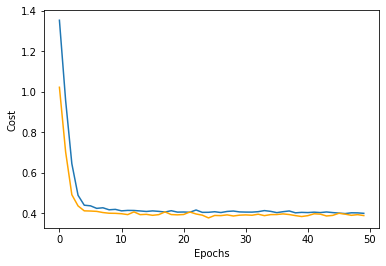

In [41]:
import matplotlib.pyplot as plt
plt.plot(range(EPOCHS), train_losses, label='training')
plt.plot(range(EPOCHS), val_losses, label='validation', color='orange')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

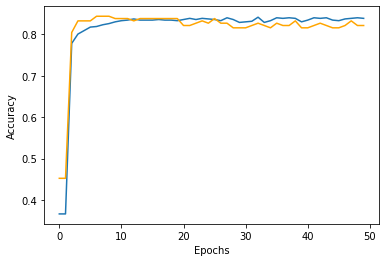

In [42]:
plt.plot(range(EPOCHS), train_accs, label='training')
plt.plot(range(EPOCHS), val_accs, label='validation', color='orange')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

In [43]:
with open("nn_weights.pkl", "rb") as f:
            model = pickle.load(f)
pred = model.predict(val_X)
# val_Y = enc.inverse_transform(val_Y).reshape(val_Y.shape[0])
print("Accuracy:", len(pred[val_Y.reshape(val_Y.shape[0]) == pred]) / len(pred))
from sklearn.metrics import confusion_matrix
array = confusion_matrix(val_Y.reshape(val_Y.shape[0]), pred)

Accuracy: 0.8212290502793296


In [44]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

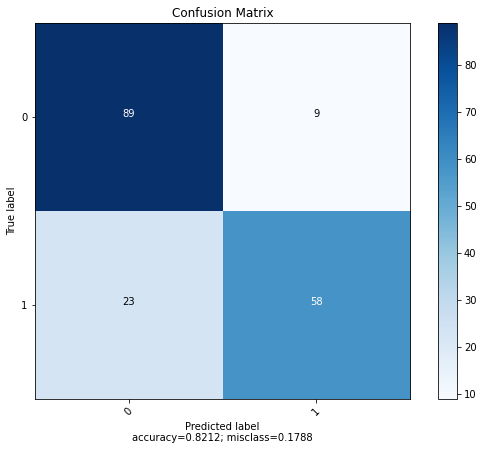

In [45]:
plot_confusion_matrix(cm           = array,
                      normalize    = False,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")

## <font color='blue'>Kiểm tra (test)

**1. Đọc dữ liệu tập kiểm tra vào data frame `test_input_df`**

In [46]:
test_input_df = pd.read_csv('test.csv', index_col=0)
test_input_df.info()
test_input_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**2. Xây dựng `test_X` từ `test_input_df`**

In [47]:
test_X = process_new_input_df(test_input_df, dropped_cols, mean_mode_dict, X_mean, X_std)

418
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 24 columns):
Pclass           418 non-null int64
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
female           418 non-null float64
 the Countess    418 non-null float64
 Major           418 non-null float64
 Col             418 non-null float64
 Ms              418 non-null float64
 Lady            418 non-null float64
 Master          418 non-null float64
 Mme             418 non-null float64
 Capt            418 non-null float64
 Miss            418 non-null float64
 Mrs             418 non-null float64
 Don             418 non-null float64
 Mlle            418 non-null float64
 Dr              418 non-null float64
 Jonkheer        418 non-null float64
 Mr              418 non-null float64
 Rev             418 non-null float64
C                418 non-null float64
Q                418 non-null float64
Fare             418

**3. Dự đoán nhãn lớp của test_X**

In [48]:
with open("nn_weights.pkl", "rb") as f:
            nn = pickle.load(f)
        
# Predict
preds = nn.predict(test_X)
preds_df = pd.DataFrame(preds, index=test_input_df.index, columns=['Survived'])
preds_df.head()
preds_df.to_csv('preds.csv')

*submit file `preds.csv` lên [Kaggle](https://www.kaggle.com/c/titanic/submissions/attach), và ghi nhận lại độ chính xác.*

Kết quả cho single model MLP from Scratch: ```Your submission scored 0.80622```